In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")

In [2]:
data = pd.read_csv("TrainData.csv")
with pd.option_context('display.max_columns', None):
    display(data)

,GameID,Ha,pHa,La,lot_shape__A,lot_shape_symm_A,lot_shape_L_A,lot_shape_R_A,LotNumA,Hb,pHb,Lb,lot_shape__B,lot_shape_symm_B,lot_shape_L_B,lot_shape_R_B,LotNumB,Amb,Corr,diffEV,diffSDs,diffMins,diffMaxs,diffUV,RatioMin,SignMax,pBbet_Unbiased1,pBbet_UnbiasedFB,pBbet_Uniform,pBbet_Sign1,pBbet_SignFB,Dom,diffBEV0,diffBEVfb,diffSignEV,BEASTpred,block,Feedback,B_rate
0,1,3,1.0,3,1,0,0,0,1,4,0.80,0,1,0,0,0,1,0,0,0.2,1.600000,-3,1,-1.0,0.00,1,0.5970,0.5936,-0.0006,-0.2015,-0.2032,0,0.2,0.2,-8.000000e-01,0.44503,1,0,0.4224
1,1,3,1.0,3,1,0,0,0,1,4,0.80,0,1,0,0,0,1,0,0,0.2,1.600000,-3,1,-1.0,0.00,1,0.5970,0.5936,-0.0006,-0.2015,-0.2032,0,0.2,0.2,-8.000000e-01,0.48963,2,1,0.5712
2,1,3,1.0,3,1,0,0,0,1,4,0.80,0,1,0,0,0,1,0,0,0.2,1.600000,-3,1,-1.0,0.00,1,0.5970,0.5936,-0.0006,-0.2015,-0.2032,0,0.2,0.2,-8.000000e-01,0.51135,3,1,0.5680
3,1,3,1.0,3,1,0,0,0,1,4,0.80,0,1,0,0,0,1,0,0,0.2,1.600000,-3,1,-1.0,0.00,1,0.5970,0.5936,-0.0006,-0.2015,-0.2032,0,0.2,0.2,-8.000000e-01,0.51613,4,1,0.5952
4,1,3,1.0,3,1,0,0,0,1,4,0.80,0,1,0,0,0,1,0,0,0.2,1.600000,-3,1,-1.0,0.00,1,0.5970,0.5936,-0.0006,-0.2015,-0.2032,0,0.2,0.2,-8.000000e-01,0.52383,5,1,0.6496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,150,16,1.0,16,1,0,0,0,1,24,0.05,12,0,0,1,0,3,0,0,-3.4,2.672078,-4,10,4.5,0.75,1,-0.9032,-0.8962,0.5044,0.0000,0.0000,0,-3.4,-3.4,-1.780000e-15,0.24981,1,0,0.3525
746,150,16,1.0,16,1,0,0,0,1,24,0.05,12,0,0,1,0,3,0,0,-3.4,2.672078,-4,10,4.5,0.75,1,-0.9032,-0.8962,0.5044,0.0000,0.0000,0,-3.4,-3.4,-1.780000e-15,0.18980,2,1,0.2500
747,150,16,1.0,16,1,0,0,0,1,24,0.05,12,0,0,1,0,3,0,0,-3.4,2.672078,-4,10,4.5,0.75,1,-0.9032,-0.8962,0.5044,0.0000,0.0000,0,-3.4,-3.4,-1.780000e-15,0.15092,3,1,0.2150
748,150,16,1.0,16,1,0,0,0,1,24,0.05,12,0,0,1,0,3,0,0,-3.4,2.672078,-4,10,4.5,0.75,1,-0.9032,-0.8962,0.5044,0.0000,0.0000,0,-3.4,-3.4,-1.780000e-15,0.14012,4,1,0.1850


### Payouts and Probabilities of a single Problem

In [38]:
def print_problem(problem_df, problem_index):

    pb = problem_df.loc[problem_index]
    Ha = pb.Ha
    La = pb.La
    pha = pb.pHa
    Hb = pb.Hb
    
    print("{:^55}".format(f"Problem {pb.GameID}, Feedback = {pb.Feedback}"))
    print("{:^55}".format(f"B_rate = {pb.B_rate:.4f}"))
    print(f"\n{'Gamble A':^25} {'Gamble B':>20}")
    
    print(f"\n{'Payout':<10} {'Probability':>10} {'Payout':>15} {'Probability':>15}")
    print(f"\n{pb.Ha:<10} {pb.pHa:>10} {pb.Hb:>15} {pb.pHb:>15}")
    print(f"\n{pb.La:<10} {1 - pb.pHa:>10} {pb.Lb:>15} {1 - pb.pHb:>15}")

print_problem(data, 500)

             Problem 101.0, Feedback = 0.0             
                    B_rate = 0.8300                    

        Gamble A                      Gamble B

Payout     Probability          Payout     Probability

28.0              1.0            73.0            0.05

28.0              0.0            27.0            0.95


### Feedback vs. no feedback problems

In [13]:
# inspect the ratio of feedback : no feedback problems in the dataset.
all_problems = set(data.GameID.unique())
feedback_problems = set(data[data.Feedback == 1].GameID.unique())
no_feedback_problems = set(data[data.Feedback == 0].GameID.unique())

feedback_and_no_feedback_problems = feedback_problems.intersection(no_feedback_problems)
feedback_only_problems = (all_problems - feedback_and_no_feedback_problems).intersection(feedback_problems)
no_feedback_only_problems = (all_problems - feedback_and_no_feedback_problems).intersection(no_feedback_problems)

N = len(all_problems)
N_fbk = len(feedback_only_problems)
N_no_fbk = len(no_feedback_only_problems)
N_both = len(feedback_and_no_feedback_problems)

print(f"Total n. problems: {N}")
print(f"N. probs w. ONLY feedback condition: {N_fbk} ({(N_fbk / N) * 100:.2f}%)")
print(f"N. probs w. ONLY no feedback condition: {N_no_fbk} ({(N_no_fbk / N) * 100:.2f}%)")
print(f"N. probs w. BOTH feedback & no feedback conditions: {N_both} ({(N_both / N) * 100:.2f}%)")

Total n. problems: 150
N. probs w. ONLY feedback condition: 0 (0.00%)
N. probs w. ONLY no feedback condition: 0 (0.00%)
N. probs w. BOTH feedback & no feedback conditions: 150 (100.00%)


### B_Rate distribution

In [7]:
with pd.option_context('display.max_columns', None):
    print("Entries with largest bRate:")
    display(data.sort_values("B_rate", ascending=False).head(10))

Entries with largest bRate standard deviation:


,GameID,Ha,pHa,La,lot_shape__A,lot_shape_symm_A,lot_shape_L_A,lot_shape_R_A,LotNumA,Hb,pHb,Lb,lot_shape__B,lot_shape_symm_B,lot_shape_L_B,lot_shape_R_B,LotNumB,Amb,Corr,diffEV,diffSDs,diffMins,diffMaxs,diffUV,RatioMin,SignMax,pBbet_Unbiased1,pBbet_UnbiasedFB,pBbet_Uniform,pBbet_Sign1,pBbet_SignFB,Dom,diffBEV0,diffBEVfb,diffSignEV,BEASTpred,block,Feedback,B_rate
444,89,17,1.0,17,1,0,0,0,1,44,0.10,17,1,0,0,0,1,0,0,2.70,8.100000,0,27,13.5,1.000000,1,0.1012,0.0927,0.5014,0.0000,0.0000,1,2.70,2.70,0.0,1.0,5,1,1.0
359,72,-9,1.0,-9,1,0,0,0,1,13,0.25,-8,1,0,0,0,1,0,0,6.25,9.093267,1,22,11.5,0.888889,1,1.0000,1.0000,1.0000,0.2504,0.2422,1,6.25,6.25,11.0,1.0,5,1,1.0
578,116,2,1.0,2,1,0,0,0,1,45,0.05,3,0,1,0,0,5,0,0,3.10,9.156419,1,45,36.0,0.666667,1,1.0000,1.0000,1.0000,0.0000,0.0000,1,3.10,3.10,0.0,1.0,4,1,1.0
443,89,17,1.0,17,1,0,0,0,1,44,0.10,17,1,0,0,0,1,0,0,2.70,8.100000,0,27,13.5,1.000000,1,0.1012,0.0927,0.5014,0.0000,0.0000,1,2.70,2.70,0.0,1.0,4,1,1.0
358,72,-9,1.0,-9,1,0,0,0,1,13,0.25,-8,1,0,0,0,1,0,0,6.25,9.093267,1,22,11.5,0.888889,1,1.0000,1.0000,1.0000,0.2504,0.2422,1,6.25,6.25,11.0,1.0,4,1,1.0
522,105,30,1.0,30,1,0,0,0,1,90,0.01,36,1,0,0,0,1,0,0,6.54,5.372932,6,60,33.0,0.833333,1,1.0000,1.0000,1.0000,0.0000,0.0000,1,6.54,6.54,0.0,1.0,3,1,1.0
188,38,24,1.0,24,1,0,0,0,1,34,0.05,28,1,0,0,0,1,0,0,4.30,1.307670,4,10,7.0,0.857143,1,1.0000,1.0000,1.0000,0.0000,0.0000,1,4.30,4.30,0.0,1.0,4,1,1.0
189,38,24,1.0,24,1,0,0,0,1,34,0.05,28,1,0,0,0,1,0,0,4.30,1.307670,4,10,7.0,0.857143,1,1.0000,1.0000,1.0000,0.0000,0.0000,1,4.30,4.30,0.0,1.0,5,1,1.0
523,105,30,1.0,30,1,0,0,0,1,90,0.01,36,1,0,0,0,1,0,0,6.54,5.372932,6,60,33.0,0.833333,1,1.0000,1.0000,1.0000,0.0000,0.0000,1,6.54,6.54,0.0,1.0,4,1,1.0
524,105,30,1.0,30,1,0,0,0,1,90,0.01,36,1,0,0,0,1,0,0,6.54,5.372932,6,60,33.0,0.833333,1,1.0000,1.0000,1.0000,0.0000,0.0000,1,6.54,6.54,0.0,1.0,5,1,1.0


In [8]:
with pd.option_context('display.max_columns', None):
    print("Entries with smallest bRate:")
    display(data.sort_values("B_rate", ascending=True).head(10))

Entries with smallest bRate:


,GameID,Ha,pHa,La,lot_shape__A,lot_shape_symm_A,lot_shape_L_A,lot_shape_R_A,LotNumA,Hb,pHb,Lb,lot_shape__B,lot_shape_symm_B,lot_shape_L_B,lot_shape_R_B,LotNumB,Amb,Corr,diffEV,diffSDs,diffMins,diffMaxs,diffUV,RatioMin,SignMax,pBbet_Unbiased1,pBbet_UnbiasedFB,pBbet_Uniform,pBbet_Sign1,pBbet_SignFB,Dom,diffBEV0,diffBEVfb,diffSignEV,BEASTpred,block,Feedback,B_rate
417,84,27,1.00,27,1,0,0,0,1,22,0.99,-7,1,0,0,0,1,0,0,-5.29,2.885464,-34,-5,-19.5,0.000000,1,-1.0,-1.0,-1.0,-0.0113,-0.0116,-1,-5.290000,-5.290000,-0.68,0.0,3,1,0.000000
213,43,14,1.00,14,1,0,0,0,1,12,0.90,9,1,0,0,0,1,0,0,-2.30,0.900000,-5,-2,-3.5,0.642857,1,-1.0,-1.0,-1.0,0.0000,0.0000,-1,-2.300000,-2.300000,0.00,0.0,4,1,0.000000
212,43,14,1.00,14,1,0,0,0,1,12,0.90,9,1,0,0,0,1,0,0,-2.30,0.900000,-5,-2,-3.5,0.642857,1,-1.0,-1.0,-1.0,0.0000,0.0000,-1,-2.300000,-2.300000,0.00,0.0,3,1,0.002469
418,84,27,1.00,27,1,0,0,0,1,22,0.99,-7,1,0,0,0,1,0,0,-5.29,2.885464,-34,-5,-19.5,0.000000,1,-1.0,-1.0,-1.0,-0.0113,-0.0116,-1,-5.290000,-5.290000,-0.68,0.0,4,1,0.002500
419,84,27,1.00,27,1,0,0,0,1,22,0.99,-7,1,0,0,0,1,0,0,-5.29,2.885464,-34,-5,-19.5,0.000000,1,-1.0,-1.0,-1.0,-0.0113,-0.0116,-1,-5.290000,-5.290000,-0.68,0.0,5,1,0.002500
369,74,44,0.05,16,1,0,0,0,1,14,0.90,10,0,1,0,0,3,1,0,-3.80,-4.727686,-6,-29,-17.0,0.625000,1,-1.0,-1.0,-1.0,0.0000,0.0000,-1,-3.933333,-3.866667,0.00,0.0,5,1,0.002500
368,74,44,0.05,16,1,0,0,0,1,14,0.90,10,0,1,0,0,3,1,0,-3.80,-4.727686,-6,-29,-17.0,0.625000,1,-1.0,-1.0,-1.0,0.0000,0.0000,-1,-3.933333,-3.866667,0.00,0.0,4,1,0.002500
214,43,14,1.00,14,1,0,0,0,1,12,0.90,9,1,0,0,0,1,0,0,-2.30,0.900000,-5,-2,-3.5,0.642857,1,-1.0,-1.0,-1.0,0.0000,0.0000,-1,-2.300000,-2.300000,0.00,0.0,5,1,0.004938
687,138,23,1.00,23,1,0,0,0,1,21,0.80,16,1,0,0,0,1,0,0,-3.00,2.000000,-7,-2,-4.5,0.695652,1,-1.0,-1.0,-1.0,0.0000,0.0000,-1,-3.000000,-3.000000,0.00,0.0,3,1,0.007500
404,81,10,0.25,2,1,0,0,0,1,-1,0.90,-32,1,0,0,0,1,1,0,-8.10,5.835898,-34,-11,-22.5,0.000000,1,-1.0,-1.0,-1.0,-1.0000,-1.0000,-1,-18.833333,-13.466667,-84.00,0.0,5,1,0.012500


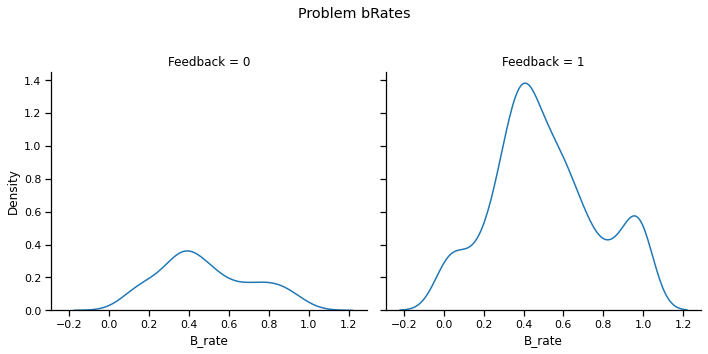

In [10]:
# overall distribution of B-rates, stratified by Feedback
g = sns.displot(data=data, x="B_rate", col="Feedback", kind="kde")
_ = g.fig.subplots_adjust(top=0.8)
_ = g.fig.suptitle('Problem bRates')